In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import regex as re
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
from plotnine import *
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
sns.set_style("whitegrid")
from sklearn.ensemble import GradientBoostingRegressor
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs

In [2]:
data = pd.read_csv('cleaned_data_barca2.csv')
barca4 = pd.read_csv('cleaned_data_barca4.csv')
madrid = pd.read_csv('cleaned_data_madrid.csv')

In [3]:
data.shape

(15612, 67)

In [4]:
data.describe()

,id,host_acceptance_rate,latitude,longitude,bedrooms,price,maximum_nights,availability_30,availability_60,availability_90,...,f_number_of_reviews,ln_days_since,ln_days_since2,ln_days_since3,n_days_since2,n_days_since3,ln_review_scores_rating,f_minimum_nights,distance,in_center
count,1.561200e+04,15612.000000,15612.000000,15612.000000,15612.000000,15612.000000,15612.000000,15612.000000,15612.000000,15612.000000,...,15611.000000,15612.000000,15612.000000,15612.000000,1.561200e+04,1.561200e+04,15612.000000,15611.000000,15612.000000,15612.000000
mean,5.488582e+17,86.117538,41.392004,2.166935,1.769664,110.305726,511.054061,14.503075,32.836600,52.964579,...,1.067965,6.655956,45.750886,321.829557,2.916263e+06,8.661120e+09,1.522771,2.261610,1.851366,0.645401
std,5.229909e+17,23.557487,0.013871,0.017521,1.126992,104.879221,395.121662,10.536158,20.422308,29.972709,...,0.707826,1.203840,14.548174,140.209169,4.564966e+06,1.817431e+10,0.137706,0.906012,1.170015,0.478407
min,1.867400e+04,0.000000,41.335310,2.090310,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,1.000000,0.022265,0.000000
25%,3.148763e+07,85.000000,41.381128,2.156649,1.000000,52.000000,330.000000,5.000000,15.000000,30.000000,...,1.000000,6.194405,38.370658,237.683412,2.401000e+05,1.176490e+08,1.512927,1.000000,0.989227,0.000000
50%,6.595190e+17,97.000000,41.389915,2.167630,1.000000,88.000000,365.000000,14.000000,35.000000,59.000000,...,1.000000,6.825460,46.586905,317.977056,8.482410e+05,7.812300e+08,1.549688,3.000000,1.594674,1.000000
75%,1.070916e+18,100.000000,41.401301,2.177294,2.000000,130.000000,1125.000000,24.000000,52.000000,80.000000,...,2.000000,7.553811,57.060058,431.020888,3.640464e+06,6.946005e+09,1.576915,3.000000,2.423993,1.000000
max,1.309263e+18,100.000000,41.456377,2.221830,18.000000,1058.000000,1125.000000,30.000000,60.000000,90.000000,...,2.000000,8.569596,73.437973,629.333753,2.776236e+07,1.462799e+11,1.609438,3.000000,7.896295,1.000000


In [5]:
data.isnull().sum().loc[lambda x: x > 0]

ln_beds                311
f_bathroom               2
f_number_of_reviews      1
f_minimum_nights         1
dtype: int64

In [6]:
barca4.isnull().sum().loc[lambda x: x > 0]

ln_beds                1753
f_bathroom                2
f_number_of_reviews       1
f_minimum_nights          1
dtype: int64

In [7]:
madrid.isnull().sum().loc[lambda x: x > 0]

ln_beds                2972
f_bathroom                1
f_number_of_reviews       1
f_minimum_nights          1
dtype: int64

In [8]:
data['f_bathroom']=data['f_bathroom'].fillna(1)
data['f_minimum_nights']=data['f_minimum_nights'].fillna(1)
data['f_number_of_reviews']=data['f_number_of_reviews'].fillna(1)
data['ln_beds']=data['ln_beds'].fillna(0)

barca4['f_bathroom'] = barca4['f_bathroom'].fillna(1)
barca4['f_minimum_nights'] = barca4['f_minimum_nights'].fillna(1)
barca4['f_number_of_reviews'] = barca4['f_number_of_reviews'].fillna(1)
barca4['ln_beds'] = barca4['ln_beds'].fillna(0)

madrid['f_bathroom'] = madrid['f_bathroom'].fillna(1)
madrid['f_minimum_nights'] = madrid['f_minimum_nights'].fillna(1)
madrid['f_number_of_reviews'] = madrid['f_number_of_reviews'].fillna(1)
madrid['ln_beds'] = madrid['ln_beds'].fillna(0)


In [9]:
data.flag_days_since.value_counts()

flag_days_since
0    12196
1     3416
Name: count, dtype: int64

In [10]:
data.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [11]:
barca4.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [12]:
madrid.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

## Create new variables measuring the time since: squared, cubic, logs

In [13]:
data = data.assign(
    ln_days_since=lambda x: np.log(x["n_days_since"] + 1),
    ln_days_since2=lambda x: np.log(x["n_days_since"] + 1) ** 2,
    ln_days_since3=lambda x: np.log(x["n_days_since"] + 1) ** 3,
    n_days_since2=lambda x: x["n_days_since"] ** 2,
    n_days_since3=lambda x: x["n_days_since"] ** 3,
    ln_review_scores_rating=lambda x: np.log(x["n_review_scores_rating"]),
).assign(
    ln_days_since=lambda x: np.where(
        x["ln_days_since"].isnull(), 0, x["ln_days_since"]
    ),
    ln_days_since2=lambda x: np.where(
        x["ln_days_since2"].isnull(), 0, x["ln_days_since2"]
    ),
    ln_days_since3=lambda x: np.where(
        x["ln_days_since3"].isnull(), 0, x["ln_days_since3"]
    ),
)

barca4 = barca4.assign(
    ln_days_since=lambda x: np.log(x["n_days_since"] + 1),
    ln_days_since2=lambda x: np.log(x["n_days_since"] + 1) ** 2,
    ln_days_since3=lambda x: np.log(x["n_days_since"] + 1) ** 3,
    n_days_since2=lambda x: x["n_days_since"] ** 2,
    n_days_since3=lambda x: x["n_days_since"] ** 3,
    ln_review_scores_rating=lambda x: np.log(x["n_review_scores_rating"]),
).assign(
    ln_days_since=lambda x: np.where(
        x["ln_days_since"].isnull(), 0, x["ln_days_since"]
    ),
    ln_days_since2=lambda x: np.where(
        x["ln_days_since2"].isnull(), 0, x["ln_days_since2"]
    ),
    ln_days_since3=lambda x: np.where(
        x["ln_days_since3"].isnull(), 0, x["ln_days_since3"]
    ),
)


madrid = madrid.assign(
    ln_days_since=lambda x: np.log(x["n_days_since"] + 1),
    ln_days_since2=lambda x: np.log(x["n_days_since"] + 1) ** 2,
    ln_days_since3=lambda x: np.log(x["n_days_since"] + 1) ** 3,
    n_days_since2=lambda x: x["n_days_since"] ** 2,
    n_days_since3=lambda x: x["n_days_since"] ** 3,
    ln_review_scores_rating=lambda x: np.log(x["n_review_scores_rating"]),
).assign(
    ln_days_since=lambda x: np.where(
        x["ln_days_since"].isnull(), 0, x["ln_days_since"]
    ),
    ln_days_since2=lambda x: np.where(
        x["ln_days_since2"].isnull(), 0, x["ln_days_since2"]
    ),
    ln_days_since3=lambda x: np.where(
        x["ln_days_since3"].isnull(), 0, x["ln_days_since3"]
    ),
)


In [14]:
data.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [15]:
data['n_accommodates'].describe()

count    15612.000000
mean         3.563989
std          2.195655
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         16.000000
Name: n_accommodates, dtype: float64

In [16]:
data = data.loc[data.n_accommodates < 8]
barca4 = barca4.loc[barca4.n_accommodates < 8]
madrid = madrid.loc[madrid.n_accommodates < 8]


In [17]:
data.groupby(["room_type"]).agg(mean_price=("price", np.mean))

,mean_price
room_type,
Entire home/apt,121.654370
Hotel room,136.094595
Private room,60.110787
Shared room,54.558824


In [18]:
data.price.describe()

count    14771.000000
mean       101.101347
std         89.683556
min          5.000000
25%         50.000000
50%         85.000000
75%        122.000000
max       1050.000000
Name: price, dtype: float64

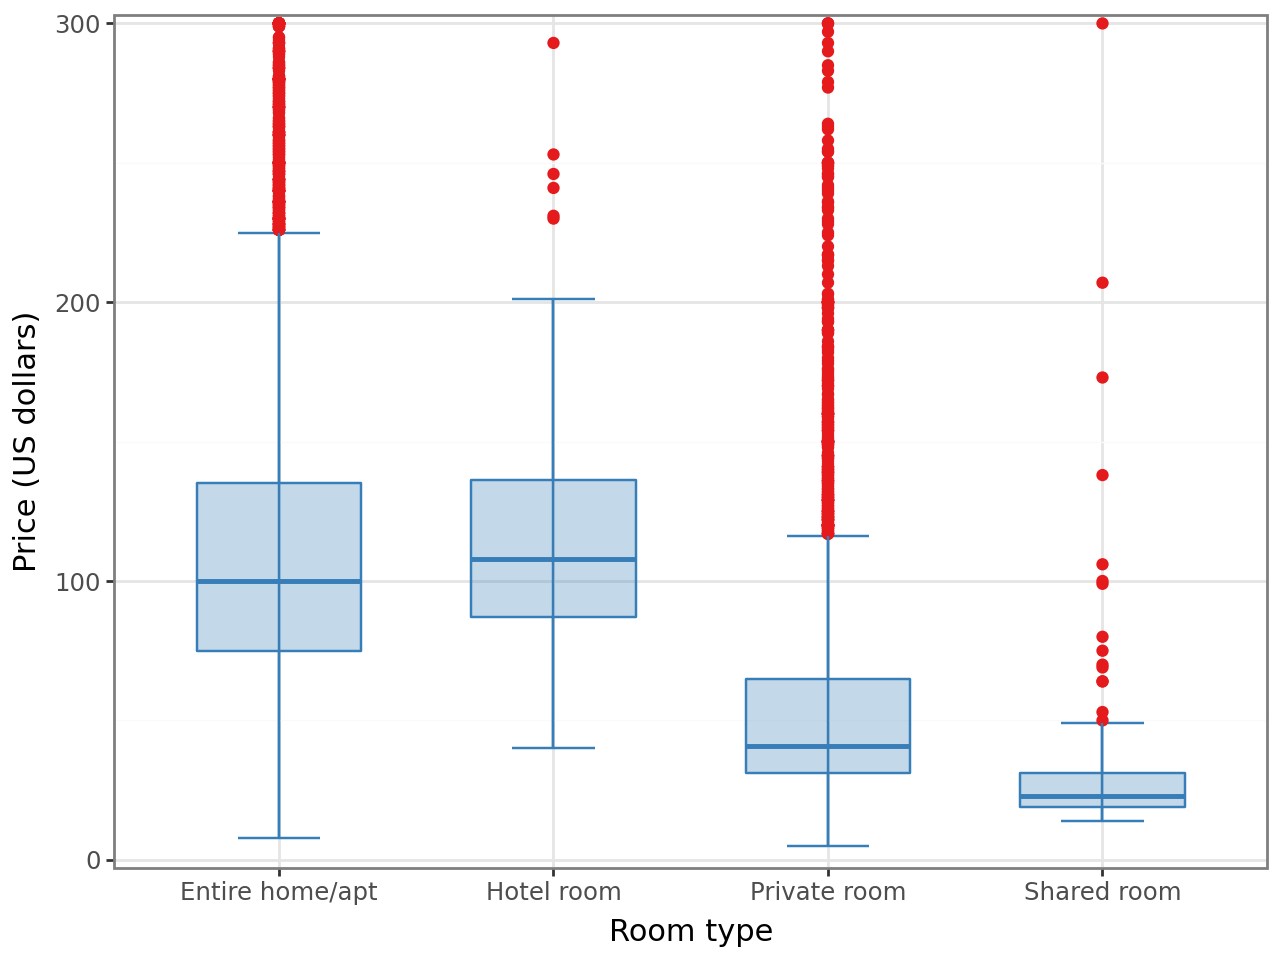

In [19]:
# Define the colors (replace with actual color values)
color = ["#E41A1C", "#377EB8", "#4DAF4A"]

# Define the plot
plot = (
    ggplot(data, aes(x="room_type", y="price"))
    + stat_boxplot(
        aes(group="room_type"),
        geom="errorbar",
        width=0.3,
        color=color[1],  # Adjusted to a valid color format
        size=0.5,
        na_rm=True,
    )
    + geom_boxplot(
        aes(group="room_type"),
        color=color[1],  # Boxplot border color
        fill=color[1],  # Boxplot fill color
        size=0.5,
        width=0.6,
        alpha=0.3,
        na_rm=True,
        outlier_color=color[0],  # Specify a valid color instead of an empty string
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 300), breaks=np.arange(0, 301, 100))
    + labs(x="Room type", y="Price (US dollars)")
    + theme_bw()
)

# Display the plot
print(plot)


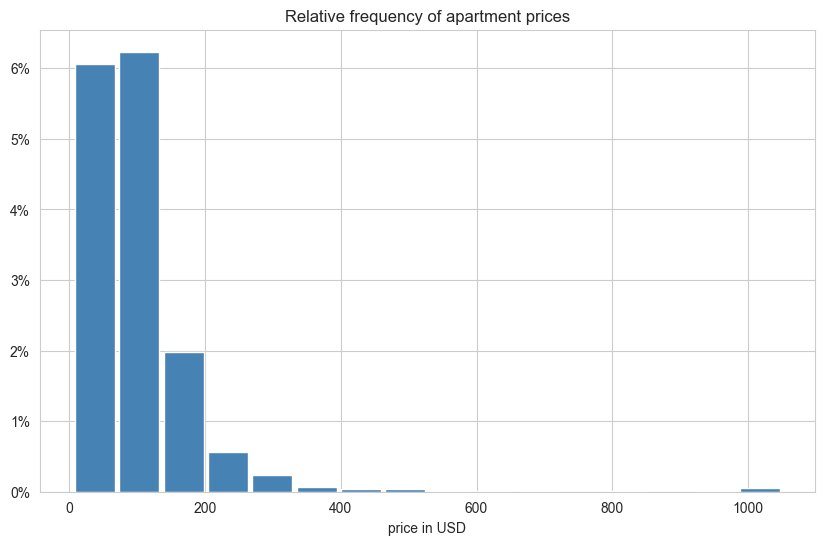

In [20]:
# relative frequencies with matplotlib

from matplotlib.ticker import PercentFormatter
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(data.price, bins = 16, density = True, rwidth = 0.9, color = 'steelblue')
ax.set_xlabel('price in USD')
# ax.grid()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=0.1, decimals = 0))
ax.set_title('Relative frequency of apartment prices')
plt.show()

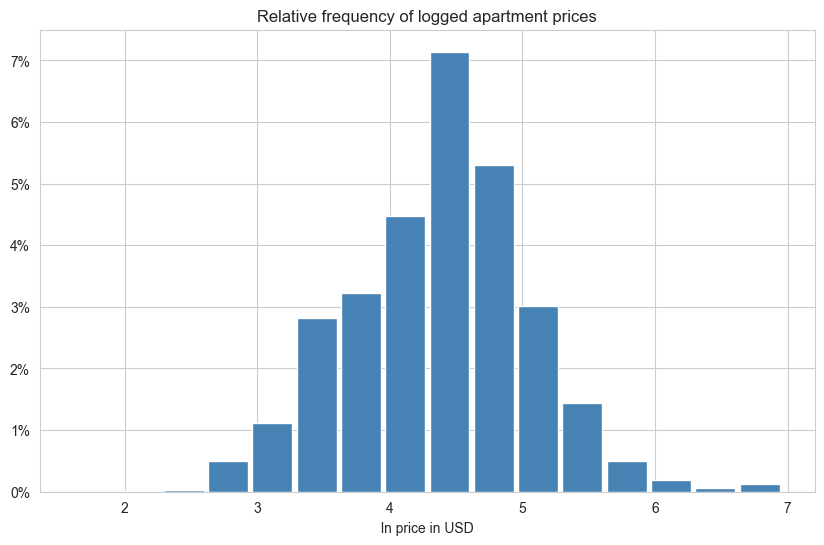

In [21]:
# relative frequencies with matplotlib
from matplotlib.ticker import PercentFormatter
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(data.ln_price, bins = 16, density = True, rwidth = 0.9, color = 'steelblue')
# ax.set_xticks(range(0, df.price.max(), 2000))
ax.set_xlabel('ln price in USD')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=10, decimals = 0))
ax.set_title('Relative frequency of logged apartment prices')
plt.show()

In [22]:
data["room_type"] = pd.Categorical(
    data["room_type"], categories=sorted(set(data["room_type"]), reverse=False)
)
barca4["room_type"] = pd.Categorical(
    barca4["room_type"], categories=sorted(set(barca4["room_type"]), reverse=False)
)

madrid["room_type"] = pd.Categorical(
    madrid["room_type"], categories=sorted(set(madrid["room_type"]), reverse=False)
)


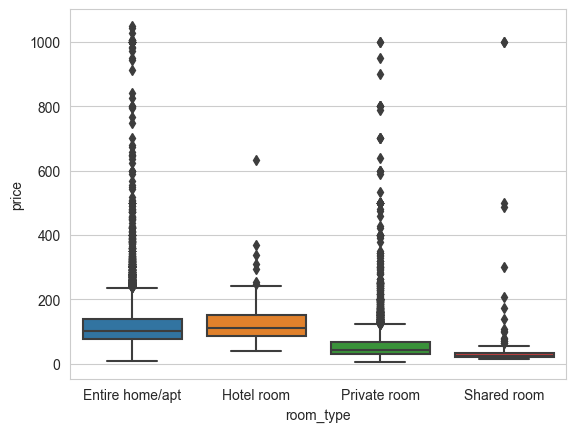

In [23]:
sns.boxplot(data = data, x = 'room_type', y = 'price', orient = 'v', order = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'])
plt.show()

In [24]:
data.room_type.value_counts()

room_type
Entire home/apt    9759
Private room       4802
Shared room         136
Hotel room           74
Name: count, dtype: int64

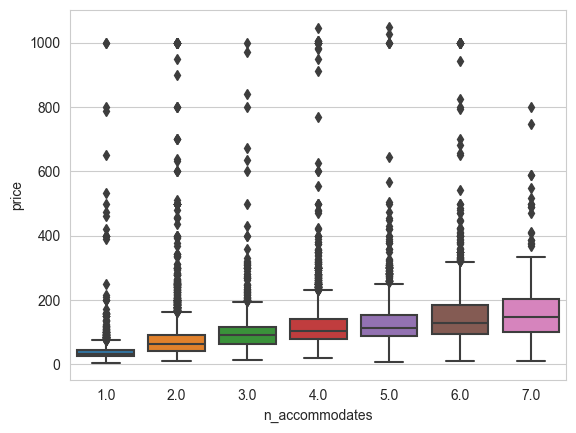

In [25]:
sns.boxplot(data = data, x = 'n_accommodates', y = 'price', orient = 'v')
plt.show()

In [26]:
data.n_accommodates.value_counts().sort_index()

n_accommodates
1.0    2030
2.0    4595
3.0    1518
4.0    3428
5.0    1333
6.0    1570
7.0     297
Name: count, dtype: int64

# Part 2. Setting up models

In [27]:
basic_lev = ( "n_accommodates",
    "n_beds",
    "room_type",
    "n_days_since",
    "flag_days_since",
    "f_bathroom",
     "distance")

host = ("host_acceptance_rate",
    "host_is_superhost",
    "host_has_profile_pic",
    "host_identity_verified")

amenities = (
    "Laundry",
    "Essentials",
    "Heating_Cooling",
    "Kitchen",
    "Outdoor",
    "Workspace",
    "Entertainment",
    "Luxury",
    "Internet",
    "Parking",
    "Family"
)

nights = ( "n_minimum_nights", "maximum_nights") 
reviews = ("f_number_of_reviews", "n_review_scores_rating", "flag_review_scores_rating")
poly_lev = ("n_accommodates2", "n_days_since2", "n_days_since3")


## Interactions

In [28]:
def price_diff_by_variables(df, factor_var, dummy_var, factor_lab, dummy_lab):
    # Calculate statistics same way as before
    stats = df.groupby([factor_var, dummy_var]).agg(
        Mean=("price", np.mean), 
        sd=("price", np.std), 
        size=("price", "size")
    )
    stats["se"] = stats["sd"] / stats["size"] ** (1/2)
    stats["Mean_l"] = stats["Mean"] - (1.96 * stats["se"])
    stats["Mean_u"] = stats["Mean"] + (1.96 * stats["se"])
    stats = stats.drop(["sd", "size"], axis=1).reset_index()

    # Create the plot using seaborn
    # plt.figure(figsize=(10, 6))
    plt.figure()
    
    # Create bar plot
    ax = sns.barplot(
        data=stats,
        x=stats.columns[0],
        y='Mean',
        hue=stats.columns[1],
        palette=['indianred', 'steelblue'],
        ci=None
    )

    # Add error bars
    for i, group in enumerate(stats[stats.columns[1]].unique()):
        group_data = stats[stats[stats.columns[1]] == group]
        x = np.arange(len(group_data))
        
        # Adjust x positions for dodge effect
        if i == 1:
            x = x + 0.2
        else:
            x = x - 0.2
            
        plt.errorbar(
            x=x, 
            y=group_data['Mean'],
            yerr=[(group_data['Mean'] - group_data['Mean_l']), 
                  (group_data['Mean_u'] - group_data['Mean'])],
            fmt='none',
            color='black',
            capsize=3
        )

    # Customize the plot
    plt.xlabel(factor_lab)
    plt.ylabel('Mean Price')
    
    # Customize legend
    plt.legend(
        title=dummy_lab,
        bbox_to_anchor=(0.5, 1.15),
        loc='center',
        ncol=2,
        fontsize=10,
        title_fontsize=10
    )
    
    # Remove grid
    ax.grid(False)
    plt.show()
    
    return plt

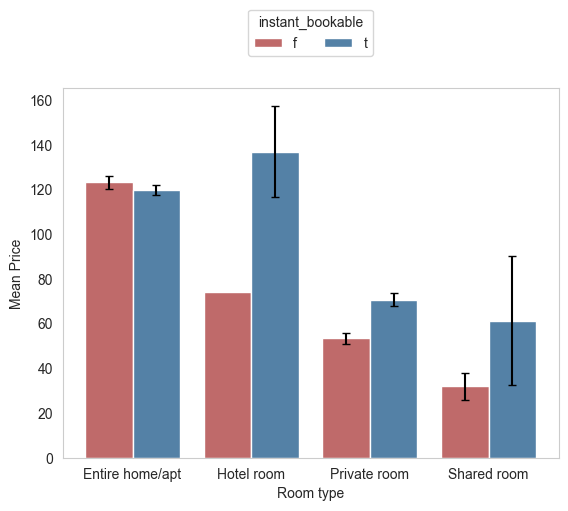

<module 'matplotlib.pyplot' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [29]:
price_diff_by_variables(data, "room_type", 'instant_bookable', "Room type", 'instant_bookable')

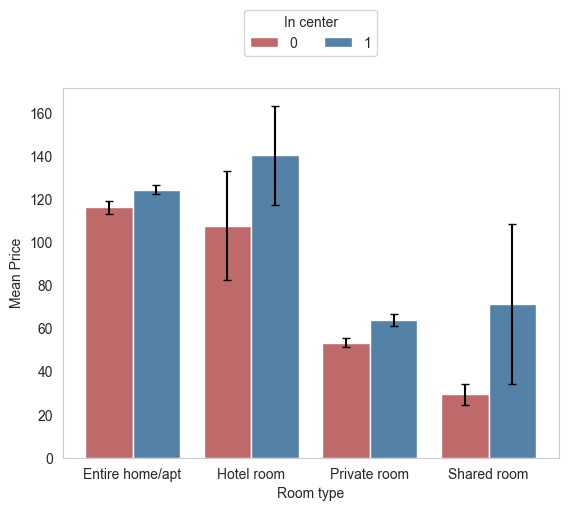

<module 'matplotlib.pyplot' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [30]:
price_diff_by_variables(data, "room_type", 'in_center', "Room type", 'In center')

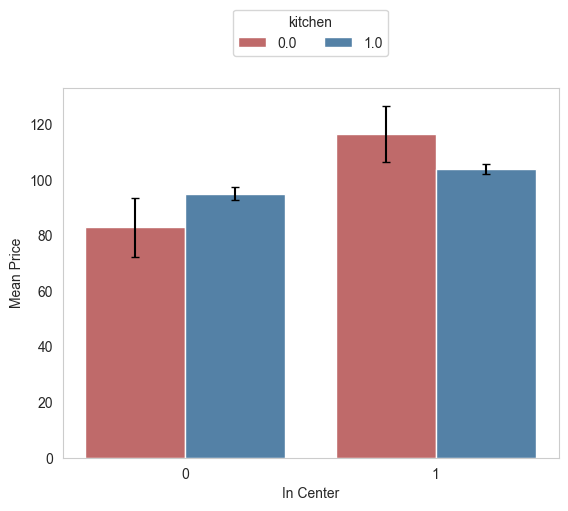

In [31]:
price_diff_by_variables(data, "in_center", "Kitchen", "In Center", "kitchen");

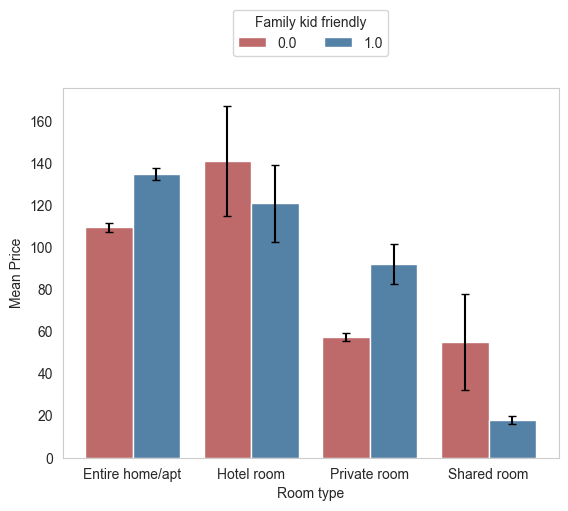

<module 'matplotlib.pyplot' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [32]:
price_diff_by_variables(data,"room_type","Family","Room type", "Family kid friendly")

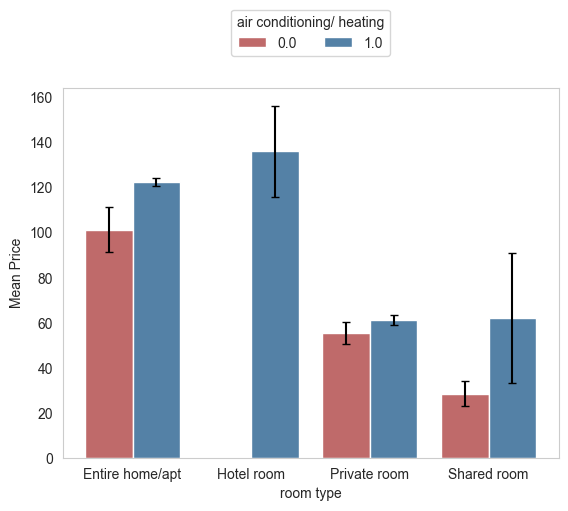

In [33]:
price_diff_by_variables(data, "room_type", "Heating_Cooling", "room type", "air conditioning/ heating");

In [34]:
X1 = ("room_type*instant_bookable", "room_type*Family")
X2 = ("room_type*in_center", "in_center*Kitchen", "room_type*Heating_Cooling")


basic_lev,
basic_add, 
reviews ,
host ,
nights ,
amenities ,
poly_lev 

In [35]:
modellev1="~ n_accommodates"
modellev2="~"+"+".join(basic_lev)
modellev3="~"+"+".join(basic_lev)+"+"+"+".join(reviews)
modellev4="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)
modellev5="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(nights)
modellev6="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(nights)+"+"+"+".join(amenities)
modellev7="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(nights)+"+"+"+".join(amenities)+"+"+"+".join(poly_lev)
modellev8="~"+"+".join(basic_lev)+"+"+"+".join(reviews)+"+"+"+".join(host)+"+"+"+".join(nights)+"+"+"+".join(amenities)+"+"+"+".join(X1)+"+"+"+".join(X2)



In [36]:
modellev8

'~n_accommodates+n_beds+room_type+n_days_since+flag_days_since+f_bathroom+distance+f_number_of_reviews+n_review_scores_rating+flag_review_scores_rating+host_acceptance_rate+host_is_superhost+host_has_profile_pic+host_identity_verified+n_minimum_nights+maximum_nights+Laundry+Essentials+Heating_Cooling+Kitchen+Outdoor+Workspace+Entertainment+Luxury+Internet+Parking+Family+room_type*instant_bookable+room_type*Family+room_type*in_center+in_center*Kitchen+room_type*Heating_Cooling'

# Regression with CV

In [37]:
smp_size = round(0.2 * data.shape[0])-1

In [38]:
smp_size

2953

In [39]:
# Set the seed to make results reproducable
np.random.seed(20020302)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
data_work, data_holdout = train_test_split(data, test_size = smp_size)
data_work.shape

(11818, 67)

In [42]:
data_holdout.shape

(2953, 67)

In [43]:
n_folds = 5

In [44]:
from sklearn.model_selection import KFold
from statsmodels.tools.eval_measures import mse,rmse

k = KFold(n_splits=n_folds, shuffle=False, random_state=None)

In [45]:
def cv_reg(formula, df, kfold, testdf, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []
    rmse_list_test = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(df):
        df_train, df_test = df.iloc[train_index, :], df.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data = df_train).fit()
        else:
            model = smf.ols(formula, data = df_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(df_test)]
        rsquared += [model.rsquared]

        rmse_tr = pd.concat(
            [df_train["price"], model.predict(df_train)],
            axis=1,
            keys=["price", "predicted"],
        )
        rmse_tr = rmse_tr[~rmse_tr.isna().any(axis=1)]

        rmse_te = pd.concat(
            [df_test["price"], model.predict(df_test)],
            axis=1,
            keys=["price", "predicted"],
        )
        rmse_te = rmse_te[~rmse_te.isna().any(axis=1)]

        rmse_list += [rmse(rmse_tr["price"], rmse_tr["predicted"], axis=0)]
        rmse_list_test += [rmse(rmse_te["price"], rmse_te["predicted"], axis=0)]
    nvars = model.df_model

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
        "rmse_test": rmse_list_test,
        "nvars": nvars,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cvlist))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [46]:
f_columns = data.filter(like="nights", axis=1).columns.tolist()
print(f_columns)


['maximum_nights', 'n_minimum_nights', 'f_minimum_nights']


In [47]:
cv_list = []
for i in [
    modellev1,
    modellev2,
    modellev3,
    modellev4,
    modellev5,
    modellev6,
    modellev7,
    modellev8,
]:
    cv_list += [cv_reg("price" + i, data, k, "HC0")]

In [48]:
summarize_cv(cv_list).map('{:,.3f}'.format)

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8
Fold1,85.863,84.704,84.540,83.986,83.151,81.838,81.825,81.613
Fold2,83.660,82.332,82.193,81.633,80.982,79.962,79.944,79.650
Fold3,86.312,85.091,84.874,84.409,83.630,82.424,82.392,82.210
Fold4,76.807,75.559,75.359,74.782,74.178,73.068,73.034,72.880
Fold5,80.751,79.643,79.353,78.766,77.944,76.871,76.820,76.699
Average,82.679,81.466,81.264,80.715,79.977,78.832,78.803,78.610


In [49]:
# RMSE training vs test graph

rmse_levels = {"nvars": [], "var": [], "value": []}
for i in range(0, 8):
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))
    rmse_levels["var"].append("RMSE Training")
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse"]).mean())
for i in range(0, 8):
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))
    rmse_levels["var"].append("RMSE Test")
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse_test"]).mean())
data_rmse_levels = pd.DataFrame.from_dict(rmse_levels)
data_rmse_levels["nvars2"] = data_rmse_levels["nvars"] + 1

In [50]:
data_rmse_levels

,nvars,var,value,nvars2
0,1,RMSE Training,82.678531,2
1,9,RMSE Training,81.465823,10
2,11,RMSE Training,81.263907,12
3,16,RMSE Training,80.715066,17
4,18,RMSE Training,79.976841,19
5,29,RMSE Training,78.832498,30
6,32,RMSE Training,78.802935,33
7,43,RMSE Training,78.610460,44
8,1,RMSE Test,81.762861,2
9,9,RMSE Test,81.199655,10


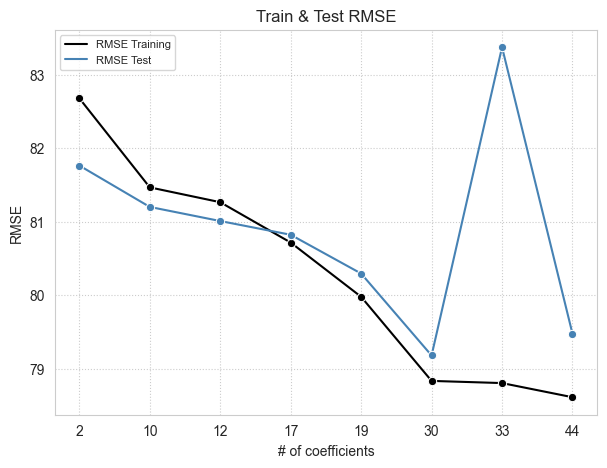

In [51]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(
    x = [str(x) for x in data_rmse_levels['nvars2']], 
    y = data_rmse_levels['value'], 
    hue = data_rmse_levels['var'], marker = 'o',
    palette = ['k', 'steelblue']
)
ax.set_title('Train & Test RMSE')
ax.set_ylabel('RMSE')
ax.set_xlabel('# of coefficients')
ax.legend(fontsize = 8, title = None)
ax.grid(linestyle = ':')
plt.show();

In [52]:
data.price.describe()

count    14771.000000
mean       101.101347
std         89.683556
min          5.000000
25%         50.000000
50%         85.000000
75%        122.000000
max       1050.000000
Name: price, dtype: float64

## Lasso

In [53]:
predictors = basic_lev + reviews + host + nights + amenities + poly_lev
predictors_2 = basic_lev + reviews + host + nights + amenities + poly_lev + X1 + X2

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler

In [55]:
lasso_model =  ElasticNet(l1_ratio = 1, fit_intercept = True)

In [56]:
lasso_model_cv = GridSearchCV(
    lasso_model,
    # {"alpha":[i/100 for i in range(1, 26, 1)]}, #> this option takes forever to run
    {"alpha":[i/100 for i in range(5, 26, 5)]},
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
)


In [57]:
y, X = dmatrices("price ~ " + " + ".join(predictors_2), data_work)

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
%%time
lasso_model_cv.fit(X_scaled, y.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ......................alpha=0.05;, score=-70.281 total time=   0.0s
[CV 2/5] END ......................alpha=0.05;, score=-87.188 total time=   0.0s
[CV 3/5] END ......................alpha=0.05;, score=-83.128 total time=   0.0s
[CV 4/5] END ......................alpha=0.05;, score=-69.547 total time=   0.0s
[CV 5/5] END ......................alpha=0.05;, score=-74.487 total time=   0.0s
[CV 1/5] END .......................alpha=0.1;, score=-70.280 total time=   0.0s
[CV 2/5] END .......................alpha=0.1;, score=-87.220 total time=   0.0s
[CV 3/5] END .......................alpha=0.1;, score=-83.128 total time=   0.0s
[CV 4/5] END .......................alpha=0.1;, score=-69.546 total time=   0.0s
[CV 5/5] END .......................alpha=0.1;, score=-74.462 total time=   0.0s
[CV 1/5] END ......................alpha=0.15;, score=-70.291 total time=   0.0s
[CV 2/5] END ......................alpha=0.15;, s

GridSearchCV(cv=5, estimator=ElasticNet(l1_ratio=1),
             param_grid={'alpha': [0.05, 0.1, 0.15, 0.2, 0.25]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [60]:
lasso_model_cv.best_estimator_

ElasticNet(alpha=0.05, l1_ratio=1)

In [61]:
lasso_rmse = pd.DataFrame(lasso_model_cv.cv_results_).loc[
    lambda x: x.param_alpha == lasso_model_cv.best_estimator_.alpha
].mean_test_score.values[0] * -1
lasso_rmse

76.926236856686

## Random forest


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import math


In [63]:
y, X = dmatrices("price ~ " + " + ".join(predictors), data = data_work)

In [64]:
X.design_info.column_names

['Intercept',
 'room_type[T.Hotel room]',
 'room_type[T.Private room]',
 'room_type[T.Shared room]',
 'host_is_superhost[T.f]',
 'host_is_superhost[T.t]',
 'host_has_profile_pic[T.t]',
 'host_identity_verified[T.t]',
 'n_accommodates',
 'n_beds',
 'n_days_since',
 'flag_days_since',
 'f_bathroom',
 'distance',
 'f_number_of_reviews',
 'n_review_scores_rating',
 'flag_review_scores_rating',
 'host_acceptance_rate',
 'n_minimum_nights',
 'maximum_nights',
 'Laundry',
 'Essentials',
 'Heating_Cooling',
 'Kitchen',
 'Outdoor',
 'Workspace',
 'Entertainment',
 'Luxury',
 'Internet',
 'Parking',
 'Family',
 'n_accommodates2',
 'n_days_since2',
 'n_days_since3']

In [65]:
print('The theoretical recommended number of variables: {:.2f}.'.format(math.sqrt(len(X.design_info.column_names))))

The theoretical recommended number of variables: 5.83.


In [66]:
rfr = RandomForestRegressor(random_state = 20020203)

In [67]:
tune_grid = {"max_features": [2, 4, 6, 8], "min_samples_leaf": [5, 10, 15]}

In [68]:
rf_random = GridSearchCV(
    estimator = rfr,
    param_grid = tune_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error",
    verbose = 3,
)

In [69]:
%%time
rf_model = rf_random.fit(X, y.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_features=2, min_samples_leaf=5;, score=-66.165 total time=   0.5s
[CV 2/5] END max_features=2, min_samples_leaf=5;, score=-83.720 total time=   0.5s
[CV 3/5] END max_features=2, min_samples_leaf=5;, score=-79.154 total time=   0.5s
[CV 4/5] END max_features=2, min_samples_leaf=5;, score=-65.704 total time=   0.5s
[CV 5/5] END max_features=2, min_samples_leaf=5;, score=-70.557 total time=   0.5s
[CV 1/5] END max_features=2, min_samples_leaf=10;, score=-67.618 total time=   0.4s
[CV 2/5] END max_features=2, min_samples_leaf=10;, score=-85.439 total time=   0.5s
[CV 3/5] END max_features=2, min_samples_leaf=10;, score=-81.471 total time=   0.4s
[CV 4/5] END max_features=2, min_samples_leaf=10;, score=-68.017 total time=   0.5s
[CV 5/5] END max_features=2, min_samples_leaf=10;, score=-72.148 total time=   0.8s
[CV 1/5] END max_features=2, min_samples_leaf=15;, score=-67.915 total time=   0.7s
[CV 2/5] END max_fea

In [70]:
rf_model.cv_results_

{'mean_fit_time': array([0.58423018, 0.57325678, 0.58997774, 1.10119009, 0.87797775,
        0.84564524, 1.54057403, 1.34428802, 1.16495695, 1.91513505,
        1.9965405 , 1.5390017 ]),
 'std_fit_time': array([0.01461716, 0.13312925, 0.09318687, 0.10937914, 0.03709708,
        0.08126219, 0.07786809, 0.10344179, 0.03644565, 0.03018917,
        0.26912202, 0.12747603]),
 'mean_score_time': array([0.03054075, 0.03083487, 0.02672725, 0.03914862, 0.0310348 ,
        0.02747092, 0.04230094, 0.0358026 , 0.03101163, 0.03979149,
        0.04170547, 0.03564024]),
 'std_score_time': array([0.00150818, 0.00858424, 0.00228685, 0.00755482, 0.00260055,
        0.00187416, 0.00920814, 0.00266621, 0.00117866, 0.00075814,
        0.00494773, 0.00354576]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obj

In [71]:
df_rf_model_cv_results = pd.DataFrame(rf_model.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'mean_test_score']]

In [72]:
df_rf_model_cv_results.columns = ['max features', 'min node size', 'RMSE']
df_rf_model_cv_results

,max features,min node size,RMSE
0,2,5,-73.060047
1,2,10,-74.938626
2,2,15,-75.653258
3,4,5,-70.720758
4,4,10,-72.487647
5,4,15,-73.505984
6,6,5,-69.783983
7,6,10,-71.558151
8,6,15,-72.571800
9,8,5,-69.268609


In [73]:
df_rf_model_cv_results.pivot(
    index = 'max features', 
    columns = 'min node size', 
    values = 'RMSE').round(2)*-1


min node size,5,10,15
max features,,,
2,73.06,74.94,75.65
4,70.72,72.49,73.51
6,69.78,71.56,72.57
8,69.27,71.22,72.23


In [74]:
rf_model.best_score_

-69.2686091069275

In [75]:
rf_model.best_estimator_

RandomForestRegressor(max_features=8, min_samples_leaf=5, random_state=20020203)

In [76]:
y_h, X_h = dmatrices("price ~ " + " + ".join(predictors), data_holdout)
pred = rf_model.predict(X_h)

In [77]:
rf_rmse = mean_squared_error(y_h, pred, squared= False)
rf_rmse

76.5017428841026

In [78]:
df_var_imp = pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)\
    .reset_index()\
    .rename({"index": "variable", 0: "imp"}, axis=1)\
    .sort_values(by=["imp"], ascending=False)\
    .reset_index(drop = True)

df_var_imp['cumulative_imp'] = df_var_imp['imp'].cumsum()

In [79]:
df_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,n_accommodates,10.6%,10.6%
1,n_accommodates2,9.3%,20.0%
2,distance,8.0%,27.9%
3,n_minimum_nights,7.5%,35.4%
4,host_acceptance_rate,6.6%,42.1%
5,n_review_scores_rating,5.3%,47.4%
6,room_type[T.Private room],5.0%,52.4%
7,n_beds,5.0%,57.4%
8,n_days_since3,4.8%,62.2%
9,f_bathroom,4.7%,66.9%


In [80]:
%matplotlib inline

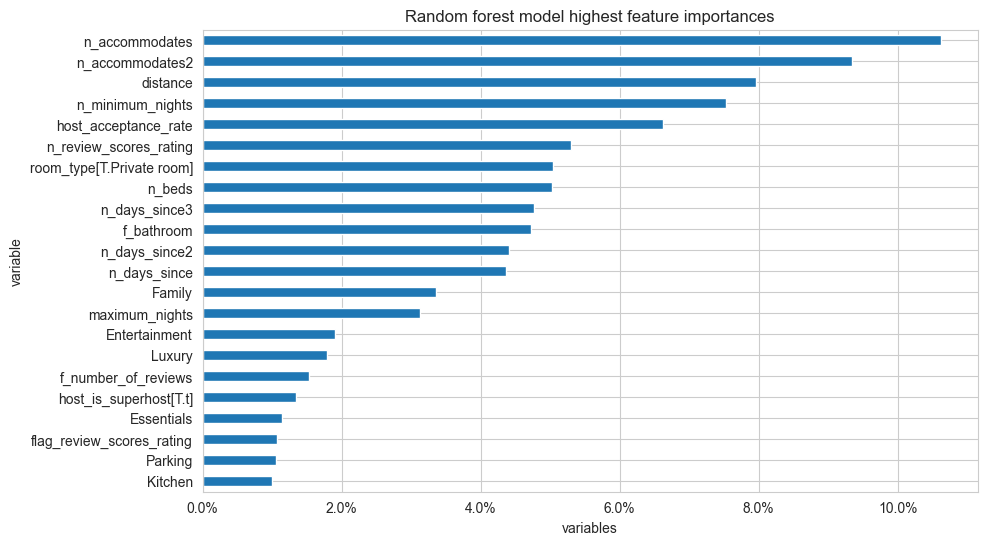

In [81]:
ax = df_var_imp[df_var_imp.imp > 0.01]\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh',
          x = 'variable', 
          y = 'imp',
          figsize = (10,6), 
          grid = True,
          title = 'Random forest model highest feature importances',
          xlabel = 'variables', 
          legend = False)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Boosting with GBM

In [82]:
numerical_columns = ['n_accommodates', 'n_accommodates2', 'distance',
                    'n_minimum_nights', 'host_acceptance_rate', 'n_review_scores_rating',
                    'n_beds', 'n_days_since3', 'n_days_since2', 'n_days_since', 'maximum_nights']
categorical_columns = [col for col in predictors if col not in numerical_columns]

In [83]:
categorical_columns

['room_type',
 'flag_days_since',
 'f_bathroom',
 'f_number_of_reviews',
 'flag_review_scores_rating',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'Laundry',
 'Essentials',
 'Heating_Cooling',
 'Kitchen',
 'Outdoor',
 'Workspace',
 'Entertainment',
 'Luxury',
 'Internet',
 'Parking',
 'Family']

In [84]:
gbm = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=20, max_features = 10)

tune_grid = {"n_estimators": [30, 45], "max_depth": [5, 10]}

gbm_model_cv = GridSearchCV(
    gbm,
    tune_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=10,
    n_jobs=-1
)

In [85]:
categorical_encoder = OneHotEncoder(handle_unknown="ignore")

In [86]:
preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", "passthrough", numerical_columns),
    ]
)

gbm_pipe = Pipeline(
    [("preprocess", preprocessing), ("regressor", gbm_model_cv)], verbose=True
)

In [87]:
predictors = list(predictors)


In [88]:
%time
gbm_pipe.fit(data_work[predictors],data_work.price)

CPU times: total: 0 ns
Wall time: 0 ns
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Pipeline] ......... (step 2 of 2) Processing regressor, total=  12.2s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['room_type',
                                                   'flag_days_since',
                                                   'f_bathroom',
                                                   'f_number_of_reviews',
                                                   'flag_review_scores_rating',
                                                   'host_is_superhost',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'Laundry', 'Essentials',
                                                   'Heating_Cooling', 'Kitchen',
                                                   'Outdoor', 'Workspace',
                                                   'Entert...
                                                   'host_acceptance_rate',
                                                   'n_review_scores_rating',
                                                   'n_beds', 'n_days_since3',
                                                   'n_days_since2',
                                                   'n_days_since',
                                                   'maximum_nights'])])),
                ('regressor',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingRegressor(max_features=10,
                                                                  min_samples_split=20),
                              n_jobs=-1,
                              param_grid={'max_depth': [5, 10],
                                          'n_estimators': [30, 45]},
                              scoring='neg_root_mean_squared_error',
                              verbose=10))],
         verbose=True)

In [89]:
gbm_model_cv.cv_results_

{'mean_fit_time': array([0.81063476, 1.39506903, 2.0495203 , 2.36725507]),
 'std_fit_time': array([0.01838221, 0.2155405 , 0.15290425, 0.19393895]),
 'mean_score_time': array([0.00737929, 0.01396275, 0.01276569, 0.01605492]),
 'std_score_time': array([0.00149296, 0.01003316, 0.00116333, 0.00434055]),
 'param_max_depth': masked_array(data=[5, 5, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[30, 45, 30, 45],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 30},
  {'max_depth': 5, 'n_estimators': 45},
  {'max_depth': 10, 'n_estimators': 30},
  {'max_depth': 10, 'n_estimators': 45}],
 'split0_test_score': array([-65.94564734, -65.80080084, -63.34739235, -65.7492975 ]),
 'split1_test_score': array([-82.2202879 , -80.57243365, -76.86410599, -75.83980821]),
 'split2_test_score': array([-77.179

In [90]:
gbm_model_cv.best_estimator_

GradientBoostingRegressor(max_depth=10, max_features=10, min_samples_split=20,
                          n_estimators=45)

In [91]:
gbm_rmse = gbm_model_cv.best_score_*-1
gbm_rmse

67.52517298813711

                   Feature  Importance
46        n_minimum_nights    0.087709
45                distance    0.082571
44         n_accommodates2    0.073413
43          n_accommodates    0.062113
47    host_acceptance_rate    0.052008
51           n_days_since2    0.045163
50           n_days_since3    0.042952
48  n_review_scores_rating    0.042379
52            n_days_since    0.039123
49                  n_beds    0.037868


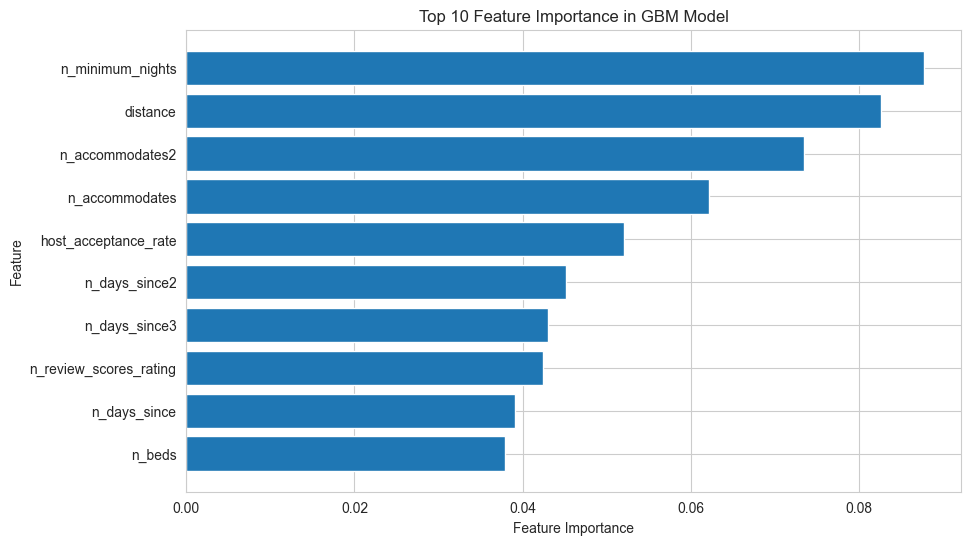

In [92]:
best_gbm_model = gbm_model_cv.best_estimator_

feature_importance = best_gbm_model.feature_importances_

# Step 3: Get the names of the transformed features
# Extract feature names after preprocessing
transformed_feature_names = (
    preprocessing.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()  # One-hot encoded categorical features
    + numerical_columns  # Numerical features
)

# Step 4: Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': feature_importance
})

# Step 5: Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Display the top N most important features
print(feature_importance_df.head(10))  # Adjust the number as needed

# Step 7: Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])  # Plot top 10 features
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance in GBM Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.grid(True)
plt.show()

### OLS RMSE

In [110]:
y, X = dmatrices("price ~ " + " + ".join(predictors_2), data = data_work)

ols_model = LinearRegression().fit(X,y)

y_hat = ols_model.predict(X)

ols_rmse = mean_squared_error(y,y_hat,squared=False)
ols_rmse

76.83078541591543

# Cart 

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
y, X = dmatrices("price ~ " + " + ".join(predictors_2), data_work)

In [96]:
cart_model = DecisionTreeRegressor(random_state=2039402)

In [97]:
path = cart_model.cost_complexity_pruning_path(X, y.ravel())
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [98]:
ccp_alphas

array([ 0.00000000e+00, -1.90819582e-17, -9.62229428e-18, ...,
        1.80690961e+02,  1.90965674e+02,  8.88355061e+02])

In [99]:
%%time

cart_model_cv = RandomizedSearchCV(
    cart_model,
    {"ccp_alpha":ccp_alphas},
    cv = 5,
    scoring="neg_root_mean_squared_error",
    verbose = 3,
)
cart_model_cv.fit(X,y.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .ccp_alpha=0.018525926039888643;, score=-103.635 total time=   0.2s
[CV 2/5] END .ccp_alpha=0.018525926039888643;, score=-108.516 total time=   0.2s
[CV 3/5] END .ccp_alpha=0.018525926039888643;, score=-104.682 total time=   0.2s
[CV 4/5] END ..ccp_alpha=0.018525926039888643;, score=-86.026 total time=   0.2s
[CV 5/5] END ..ccp_alpha=0.018525926039888643;, score=-82.978 total time=   0.2s
[CV 1/5] END .ccp_alpha=0.004075703728775571;, score=-103.735 total time=   0.2s
[CV 2/5] END .ccp_alpha=0.004075703728775571;, score=-108.485 total time=   0.2s
[CV 3/5] END .ccp_alpha=0.004075703728775571;, score=-104.784 total time=   0.1s
[CV 4/5] END ..ccp_alpha=0.004075703728775571;, score=-86.115 total time=   0.2s
[CV 5/5] END ..ccp_alpha=0.004075703728775571;, score=-83.053 total time=   0.1s
[CV 1/5] END ..ccp_alpha=0.02820556213685367;, score=-103.539 total time=   0.2s
[CV 2/5] END ..ccp_alpha=0.02820556213685367;, s

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2039402),
                   param_distributions={'ccp_alpha': array([ 0.00000000e+00, -1.90819582e-17, -9.62229428e-18, ...,
        1.80690961e+02,  1.90965674e+02,  8.88355061e+02])},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [100]:
cart_model_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.9563285136513453, random_state=2039402)

In [101]:
cart_rmse = pd.DataFrame(cart_model_cv.cv_results_).loc[
    lambda x: x.param_ccp_alpha == cart_model_cv.best_estimator_.ccp_alpha
].mean_test_score.values[0] * -1
cart_rmse

94.5576253340322

# #3. Comparison table and discussion

In [111]:
pd.DataFrame({'model': ['OLS', 'LASSO', 'Random Forest', 'GBM', 'Cart'],
              'CV RMSE': [ols_rmse, lasso_rmse,rf_rmse, gbm_rmse, cart_rmse]})

,model,CV RMSE
0,OLS,76.830785
1,LASSO,76.926237
2,Random Forest,76.501743
3,GBM,67.525173
4,Cart,94.557625


The GBM has the best performance with reasonable training time. Random Forest has a **relatively** good performance but is very slow to train. Lasso: **relatively** moderate performance but very fast to train. OLS has a moderate performance; time likely similar to LASSO. CART: worst performance with moderate training time.

# #4. Feature Importance for Random Forest and GBM

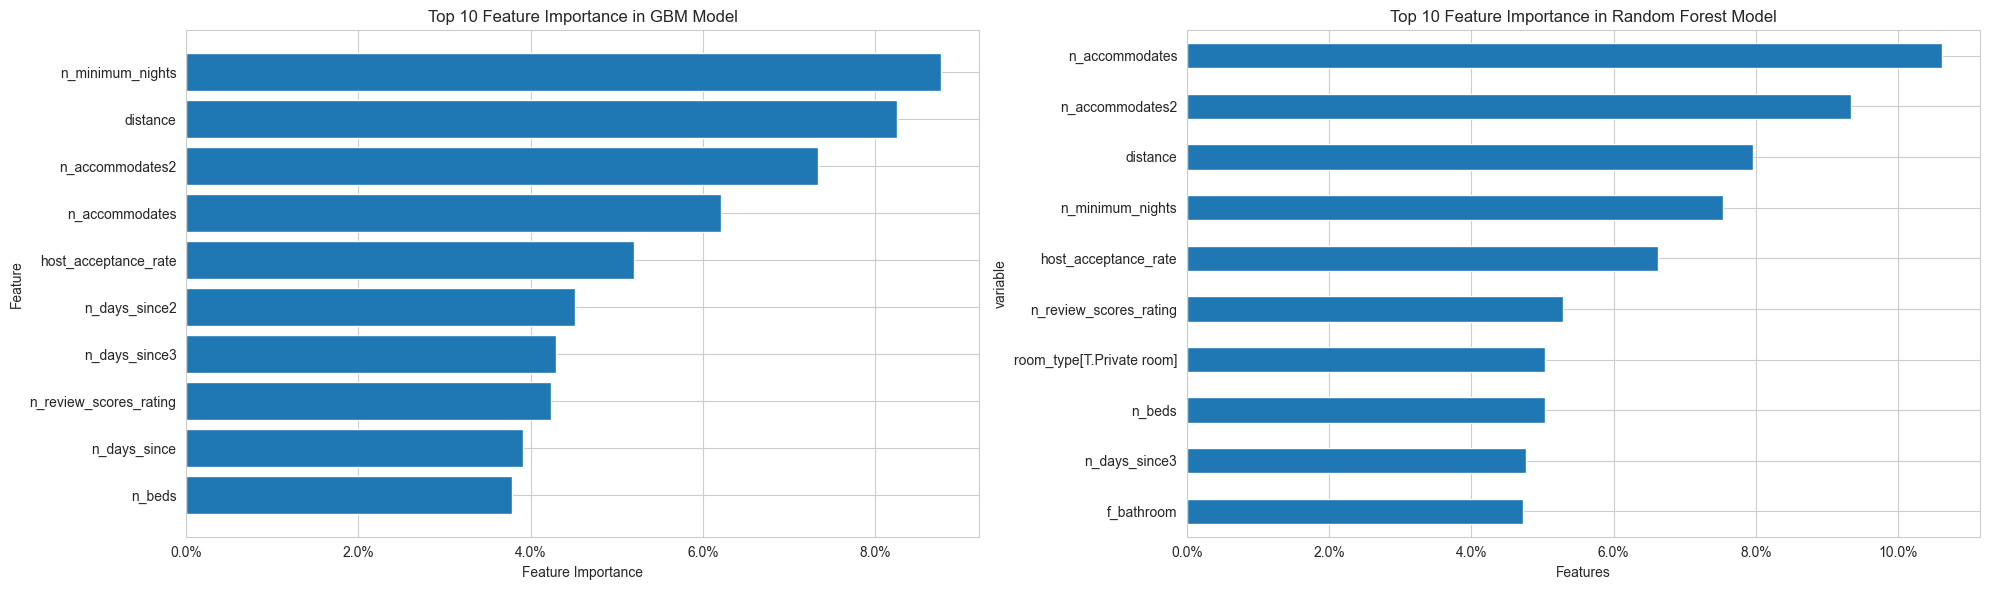

In [103]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot GBM Feature Importance
ax1.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
ax1.set_xlabel('Feature Importance')
ax1.set_ylabel('Feature')
ax1.set_title('Top 10 Feature Importance in GBM Model')
ax1.invert_yaxis()  # Invert y-axis to show the most important feature at the top
ax1.grid(True)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  # Format x-axis as percentages

# Filter and sort Random Forest features for top 10
df_var_imp_top10 = df_var_imp[df_var_imp.imp > 0.01]\
    .sort_values(by='imp', ascending=False)\
    .head(10)  # Select top 10 features

# Plot Random Forest Feature Importance (Top 10)
df_var_imp_top10.plot(kind='barh',
                      x='variable',
                      y='imp',
                      ax=ax2,  # Use the second subplot
                      grid=True,
                      title='Top 10 Feature Importance in Random Forest Model',
                      xlabel='Features',
                      legend=False)
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  # Format x-axis as percentages
ax2.invert_yaxis()  # Invert y-axis to show the most important feature at the top

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

The graphs reveal that **distance** and **n_accommodates** are among the most important features in both the GBM and Random Forest models, indicating their strong influence on the target variable. The GBM model highlights **n_minimum_nights** and **host_acceptance_rate** as significant, while the Random Forest model emphasizes **n_review_scores_rating** and **n_beds**. Both models agree on the importance of **distance**, suggesting it is a key predictor. However, the GBM model assigns higher importance to some features (e.g., **n_minimum_nights**) compared to the Random Forest, reflecting differences in how each model captures feature interactions and nonlinearities.

# Test on further quarter and Madrid

## OLS

In [149]:
y_barca4, X_barca4 = dmatrices("price ~ " + " + ".join(predictors_2), barca4, return_type='dataframe')
y_madrid, X_madrid = dmatrices("price ~ " + " + ".join(predictors_2), madrid, return_type='dataframe')

In [109]:
print(data_work.shape[1])  # Number of features in training data
print(X_barca4.shape[1])  # Number of features in X_barca4
print(X_madrid.shape[1])  # Number of features in X_madrid

67
49
49


In [150]:
y_barca4_test = ols_model.predict(X_barca4)
y_madrid_test = ols_model.predict(X_madrid)

ols_rmse_barca4 = mean_squared_error(y_barca4, y_barca4_test, squared=False)
ols_rmse_madrid = mean_squared_error(y_madrid, y_madrid_test, squared=False)

In [151]:
ols_test = pd.DataFrame({
    "Dataset": ["Barcelona next 2 quarter", "Madrid"],
    "RMSE": [ols_rmse_barca4, ols_rmse_madrid]
})
ols_test

,Dataset,RMSE
0,Barcelona next 2 quarter,130.055136
1,Madrid,3630.302407


## Lasso

In [117]:
y_barca4, X_barca4 = dmatrices("price ~ " + " + ".join(predictors_2), barca4, return_type='dataframe')
y_madrid, X_madrid = dmatrices("price ~ " + " + ".join(predictors_2), madrid, return_type='dataframe')


In [118]:
X_barca4_scaled = scaler.transform(X_barca4)
X_madrid_scaled = scaler.transform(X_madrid)

In [121]:
y_barca4_test = lasso_model_cv.best_estimator_.predict(X_barca4_scaled)
y_madrid_test = lasso_model_cv.best_estimator_.predict(X_madrid_scaled)

In [122]:
lasso_rmse_barca4_test = mean_squared_error(y_barca4, y_barca4_test, squared=False)
lasso_rmse_madrid_test = mean_squared_error(y_madrid, y_madrid_test, squared=False)

lasso_test = pd.DataFrame({
    "Dataset": ["barca4", "madrid"],
    "RMSE": [lasso_rmse_barca4_test, lasso_rmse_madrid_test]})

lasso_test


,Dataset,RMSE
0,barca4,130.070043
1,madrid,3634.874983


## Random Forest test

In [128]:
y_barca4, X_barca4 = dmatrices("price ~ " + " + ".join(predictors), barca4, return_type='dataframe')
y_madrid, X_madrid = dmatrices("price ~ " + " + ".join(predictors), madrid, return_type='dataframe')


In [125]:
predictors_2 = list(predictors_2)
rf_random.fit(X, y.ravel())

In [132]:
barca4["prediction"] = rf_model.predict(X_barca4)
madrid["prediction"] = rf_model.predict( X_madrid)

In [133]:
rf_rmse_barca4 = mean_squared_error(barca4.price, barca4.prediction, squared=False)
rf_rmse_madrid = mean_squared_error(madrid.price, madrid.prediction, squared=False)

In [135]:
rf_test = pd.DataFrame({
    "Dataset": ["Barcelona", "madrid"],
    "RMSE": [rf_rmse_barca4, rf_rmse_madrid]})

rf_test

,Dataset,RMSE
0,Barcelona,125.428109
1,madrid,88.910287


## Cart

In [136]:
y_barca4, X_barca4 = dmatrices("price ~ " + " + ".join(predictors_2), barca4, return_type='dataframe')
y_madrid, X_madrid = dmatrices("price ~ " + " + ".join(predictors_2), madrid, return_type='dataframe')


In [137]:
y_barca4_test = cart_model_cv.best_estimator_.predict(X_barca4)
y_madrid_test = cart_model_cv.best_estimator_.predict(X_madrid)


In [138]:
cart_rmse_barca4 = mean_squared_error(y_barca4, y_barca4_test, squared=False)
cart_rmse_madrid = mean_squared_error(y_madrid, y_madrid_test, squared=False)


In [139]:
cart_test = pd.DataFrame({
    "Dataset": ["barcelona", "madrid"],
    "RMSE": [cart_rmse_barca4, cart_rmse_madrid]})

cart_test


,Dataset,RMSE
0,barcelona,136.169036
1,madrid,140.125275


## gbm test

In [141]:
barca4["prediction"] = gbm_pipe.predict(barca4[predictors])
madrid["prediction"] = gbm_pipe.predict(madrid[predictors])

In [142]:
gbm_rmse_barca4 = mean_squared_error(barca4.price, barca4.prediction, squared=False)
gbm_rmse_madrid = mean_squared_error(madrid.price, madrid.prediction, squared=False)

In [143]:
gbm_test = pd.DataFrame({
    "Dataset": ["barcalona", "madrid"],
    "RMSE": [gbm_rmse_barca4, gbm_rmse_madrid]})

gbm_test


,Dataset,RMSE
0,barcalona,122.404748
1,madrid,90.644746


# Final comparison

In [145]:
compare_models = pd.DataFrame({
    'Model Name': ['OLS', 'Lasso','Random Forest', 'GBM', 'CART'],
    'Train RMSE Barcelona Q2 2024': [ols_rmse, lasso_rmse,rf_rmse, gbm_rmse, cart_rmse],
    'Test RMSE Barcelona Q4 2024': [ols_rmse_barca4, lasso_rmse_barca4_test, cart_rmse_barca4, rf_rmse_barca4, gbm_rmse_barca4],
    'Test RMSE MADRID Q4 2024': [ols_rmse_madrid, lasso_rmse_madrid_test, cart_rmse_madrid, rf_rmse_madrid, gbm_rmse_madrid]})

compare_models

,Model Name,Train RMSE Barcelona Q2 2024,Test RMSE Barcelona Q4 2024,Test RMSE MADRID Q4 2024
0,OLS,76.830785,130.055136,3630.302407
1,Lasso,76.926237,130.070043,3634.874983
2,Random Forest,76.501743,136.169036,140.125275
3,GBM,67.525173,125.428109,88.910287
4,CART,94.557625,122.404748,90.644746


The results from the model evaluation highlight interesting differences in predictive performance across the datasets for Barcelona and Madrid, two largest cities of Spain. RMSE values indicate that the models generally perform better on the Barcelona dataset compared to Madrid as the OLS and Lasso models show significantly higher RMSE values for Madrid (3630.30 and 3634.87, respectively) compared to Barcelona (130.06 and 130.07). This suggests that these linear models struggle to capture the complexity of the Madrid data, possibly due to differences in the underlying distribution of Airbnb prices or features between the two cities.

The Random Forest, Gradient Boosting Machine (GBM), and CART models perform much better on the Madrid dataset, with RMSE values dropping to 140.13, 88.91, and 90.64, respectively. This improvement indicates that tree-based models are better suited for capturing non-linear relationships and interactions in the Madrid data. However, even these models show slightly higher RMSE values for Madrid compared to Barcelona, suggesting that Madrid's Airbnb market may have more variability or complexity in pricing.

The differences in RMSE across the datasets could be attributed to several factors. Madrid and Barcelona, while both popular tourist destinations, may have distinct market dynamics, such as differences in demand patterns, property types, or seasonal fluctuations. Additionally, the feature sets used for modeling might not fully capture the unique characteristics of each city, leading to higher errors in predictions for Madrid. Further feature engineering or the inclusion of city-specific variables could help improve model performance, particularly for Madrid.

**Differences across two time periods in Barcelona:**
 The Train RMSE for Q2 is consistently lower across all models compared to the Test RMSE for Q4. For example, the OLS model has a Train RMSE of 76.83 for Q2 but a Test RMSE of 130.06 for Q4. This increase in RMSE suggests that the models trained on Q2 data struggle to generalize to Q4 data, indicating potential changes in the Airbnb market dynamics between these two quarters.

Several factors could contribute to this discrepancy. My guess is that it happened due to seasonal variations in demand and pricing and holiday-related spikes or drops in bookings (Christmas and more religious weekends are in Q4). 
Overall, the differences highlight the importance of considering temporal factors when modeling dynamic markets like Airbnb.